0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


AttributeError: 'Rectangle' object has no property 'normed'

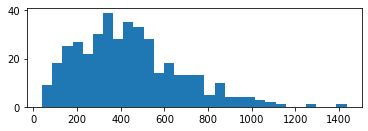

In [1]:
# Project 4: Kinetic Theory of Gases
# This project will display a video for the kinetic theory of gases as well as
# write a file  the temperature is written to a separate file and a
# distribution plot is that have an analytical fit curve over top

# Imported modeuls to run the program
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from itertools import combinations

# Global variables used across program
npoint = 400  # number of points on graph
n_f = 1000  # number of frames to count
xmin, xmax, ymin, ymax = 0, 1, 0, 1  # max and min for grid layout
fig, ax = plt.subplots()  # used for animation
plt.xlim(xmin, xmax)  # plotting parameters for grids
plt.ylim(ymin, ymax)
Dt = 0.00002  # time increment
rad = 0.00001  # radius of dots
m = 2.672E-26  # mass of dots

# Function to change all the elements according to their spacing and collisions
# takes arguments from the combination which  is just a single point


def formula(a, b):
    global vx, vy
    v1x = vx[a]
    v1y = vy[a]
    p1x = x[a]
    p1y = y[a]
    v2x = vx[b]
    v2y = vy[b]
    p2x = x[b]
    p2y = y[b]
    v1 = np.array([v1x, v1y])
    v2 = np.array([v2x, v2y])
    p1 = np.array([p1x, p1y])
    p2 = np.array([p2x, p2y])

    v1_prime = v1 - (np.dot(v1-v2, p1-p2)/(np.linalg.norm(p1-p2)**2))*(p1-p2)
    v2_prime = v2 - (np.dot(v2-v1, p2-p1)/(np.linalg.norm(p2-p1)**2))*(p2-p1)

    vx[a] = v1_prime[0]
    vy[a] = v1_prime[1]
    vx[b] = v2_prime[0]
    vy[b] = v2_prime[1]

# function given to us to create grid and points on grid
# function from above is used here to update the velocities
# These are input into this function then globally the positions
# and velocities are updated


def update(num):
    global x, y, vx, vy

    #print(num)
    indx = np.where((x < xmin) | (x > xmax))
    indy = np.where((y < ymin) | (y > ymax))
    vx[indx] = -vx[indx]
    vy[indy] = -vy[indy]
    xx = np.asarray(list(combinations(x, 2)))
    yy = np.asarray(list(combinations(y, 2)))
    dd = (xx[:, 0]-xx[:, 1])**2+(yy[:, 0]-yy[:, 1])**2
    index = np.asarray(list(combinations(range(npoint), 2)))
    ind = np.where(dd < 2*rad)  # condition to determine colision
    pt = index[ind]

# function made above is called to change conditions of each point
    for j in pt:
        formula(j[0], j[1])

    dx = Dt*vx
    dy = Dt*vy
    x = x+dx
    y = y+dy
    data = np.stack((x, y), axis=-1)
    im.set_offsets(data)

# initial conditions for points on grid
# these are updated by the functions globally

x = np.random.random(npoint)
y = np.random.random(npoint)
vx = -500.*np.ones(npoint)
vy = np.zeros(npoint)
vx[np.where(x <= 0.5)] = -vx[np.where(x <= 0.5)]
s = np.array([10])

# colouring points for the graph

colour1 = np.where(x >= 0.5)
colour2 = np.where(x < 0.5)
change = np.repeat("r", npoint)
change[colour1] = "r"
change[colour2] = "b"

# animation setting are taken care of here
im = ax.scatter(x, y, c=change)
im.set_sizes(s)
ani = animation.FuncAnimation(fig, update, n_f, interval=10, repeat=False)
ani.save("collisions.mp4")

v = np.sqrt(vx**2 + vy**2)  # solving for magnitude of velocities
v = np.sort(v)  # sorting velocity array to ease plotting
kb = 1.38064852E-23  # boltzman constant
T = (m*v**2)/(3*kb)  # solving for temperature
T = np.mean(T)  # solving for the mean of temperature values
E = (1/2)*m*(v**2)  # kinetic energy

# analytical soution for velocity distribution
Fv = ((m*v)/(kb*T))*np.exp(-(0.5*m*v**2)/(kb*T))

# analytical solution for energy
gE = ((1/(kb*T))*np.exp(-(E/(kb*T))))

# below takes care of the plotting

plt.subplot(211)
plt.hist(v, 30, normed=True, label="Probability Distribution")
plt.plot(v, Fv, 'r', label="Analytical Fit")
plt.legend()
plt.xlabel("Velocity of Particles")
plt.ylabel("Probability Distrbustion")
plt.title("Maxwell Boltzman Distribution of Speed")

plt.subplot(212)
plt.hist(E, 30, normed=True, label="Kinetic Energy Distribution")
plt.plot(E, gE, 'r', label="Analytical distribution fit")
plt.xlabel("Velocity of Particles")
plt.ylabel("Probability Density")
plt.legend()
plt.title("Boltzman Distribution")
plt.tight_layout()
plt.savefig("distributions.pdf")
plt.show()

# writint gthe value of temperature to a file called collision.txt

#f = open("collisions.txt", 'w')
#f.write("The temperature is: {} K" .format(T))
#f.close()
